In [1]:
import pandas as pd
import pingouin as pg
df = pd.read_csv('TPRMOE2018.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               38 non-null     int64  
 1   feedback         38 non-null     int64  
 2   gender           38 non-null     int64  
 3   age              38 non-null     int64  
 4   sportyear        38 non-null     int64  
 5   cohnesion1       38 non-null     float64
 6   cohnesion2       38 non-null     float64
 7   cohnesion3       38 non-null     float64
 8   b1time           38 non-null     float64
 9   b2time           38 non-null     float64
 10  b3time           38 non-null     float64
 11  b1emotion        38 non-null     float64
 12  b2emotion        38 non-null     float64
 13  b3emotion        38 non-null     float64
 14  b1achieve        38 non-null     float64
 15  b2achieve        38 non-null     float64
 16  b3achieve        38 non-null     float64
 17  b1social         3

In [2]:
wide_format = df[['No','cohnesion1','cohnesion2','cohnesion3']]
wide_format.sort_values('No').head(10)

,No,cohnesion1,cohnesion2,cohnesion3
0,1,3.555556,5.000000,5.000000
1,2,3.777778,4.333333,4.777778
2,3,4.000000,5.000000,4.555556
3,4,3.222222,4.888889,4.888889
4,5,4.000000,4.000000,3.777778
5,6,3.888889,4.222222,4.000000
6,7,3.777778,4.333333,3.777778
7,9,4.000000,5.000000,5.000000
8,10,3.777778,4.333333,4.555556
9,11,3.000000,3.777778,3.777778


In [3]:
long_format = pd.melt(wide_format, id_vars='No',
                     value_vars=['cohnesion1','cohnesion2','cohnesion3'],
                     var_name='cohnesion', value_name='cohnvalue')
long_format.sort_values('No').head(10)

,No,cohnesion,cohnvalue
0,1,cohnesion1,3.555556
76,1,cohnesion3,5.000000
38,1,cohnesion2,5.000000
1,2,cohnesion1,3.777778
77,2,cohnesion3,4.777778
39,2,cohnesion2,4.333333
2,3,cohnesion1,4.000000
78,3,cohnesion3,4.555556
40,3,cohnesion2,5.000000
3,4,cohnesion1,3.222222


In [4]:
rmaov = pg.rm_anova(dv='cohnvalue', within='cohnesion',
                subject='No',correction=False, data=long_format,
                detailed=True, effsize='ng2')
rmaov

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,cohnesion,11.308859,2,5.654429,35.627128,1.454808e-11,0.26942,0.993492
1,Error,11.744639,74,0.158711,NaN,NaN,NaN,NaN


In [5]:
import researchpy as rp
from scipy.stats import ttest_rel
co1 = df['cohnesion1']
co2 = df['cohnesion2']
co3 = df['cohnesion3']
t1 = ttest_rel(co1,co2)
t2 = ttest_rel(co1,co3)
t3 = ttest_rel(co2,co3)
print(rp.summary_cont(df[['cohnesion1', 'cohnesion2', 'cohnesion3']]).round(3))
print(t1)
print(t2)
print(t3)
# SD：標準差 SE：標準誤
# e：科學符號 10的-9次方
# t1, t2 顯著， t3 不顯著



     Variable     N   Mean     SD     SE  95% Conf.  Interval
0  cohnesion1  38.0  3.705  0.410  0.066      3.570     3.839
1  cohnesion2  38.0  4.374  0.582  0.094      4.183     4.566
2  cohnesion3  38.0  4.371  0.568  0.092      4.185     4.558
Ttest_relResult(statistic=-7.45406213187764, pvalue=7.099520598704417e-09)
Ttest_relResult(statistic=-7.016933381391582, pvalue=2.6912524821927253e-08)
Ttest_relResult(statistic=0.03276511589459661, pvalue=0.974038014397416)


單因子變異數分析

In [7]:
import pingouin as pg
from pingouin import pairwise_ttests
import researchpy as rp
import pandas as pd
df = pd.read_csv('python2011nsc.csv')
print(df.columns)
print(df.info())

Index(['NO', 'Gender', 'DateOfBirth', 'Race', 'FaEdu', 'MomEdu', 'FaexpEdu',
       'CoexpEdu', 'Income', 'Grade', 'Level', 'Sportyear', 'ExpectEdu', 'a1',
       'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6',
       'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'pl', 'al',
       'ss', 'tr', 'blue', 'achievement', 'alienance'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NO           530 non-null    int64  
 1   Gender       530 non-null    int64  
 2   DateOfBirth  530 non-null    int64  
 3   Race         530 non-null    int64  
 4   FaEdu        530 non-null    int64  
 5   MomEdu       530 non-null    int64  
 6   FaexpEdu     530 non-null    int64  
 7   CoexpEdu     530 non-null    int64  
 8   Income       530 non-null    int64  
 9   Grade        530 non-null    float6

In [8]:
rp.summary_cont(df['pl'].groupby(df['Race'])).round(3)

,N,Mean,SD,SE,95% Conf.,Interval
Race,,,,,,
1,379,3.989,0.647,0.033,3.923,4.054
2,58,4.035,0.595,0.078,3.878,4.191
3,93,3.728,0.789,0.082,3.565,3.890


In [9]:
import scipy.stats as stats
stats.levene(df['pl'][df['Race'] == 1],
            df['pl'][df['Race'] == 2],
            df['pl'][df['Race'] == 3],
            center = 'mean')

LeveneResult(statistic=4.717269339493504, pvalue=0.009320476578738789)

In [10]:
aov = pg.anova(dv = 'pl', between = 'Race', data = df, detailed = True).round(3)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Race,5.575,2,2.788,6.231,0.002,0.023
1,Within,235.758,527,0.447,NaN,NaN,NaN


In [11]:
G = df['Race'].unique()
args = []
for i in list(G):
    args.append(df[df['Race'] == i]['pl'])

In [12]:
from scipy import stats
stats.levene(*args)

LeveneResult(statistic=4.864967757524489, pvalue=0.008061929546969488)

In [14]:
from scipy import stats
stats.f_oneway(*args)

F_onewayResult(statistic=6.231133175983131, pvalue=0.002115214833399516)

In [15]:
import pingouin as pg
pg.pairwise_ttests(dv='pl', between='Race', padjust = 'bonf', data=df).round(3)

C:\ProgramData\Anaconda3\lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Race,1,2,False,True,-0.541,79.142,two-sided,0.590,1.000,bonf,0.176,-0.072
1,Race,1,3,False,True,2.954,124.025,two-sided,0.004,0.011,bonf,8.007,0.385
2,Race,2,3,False,True,2.713,143.642,two-sided,0.007,0.022,bonf,4.979,0.423


### 資料相關度與簡單線性迴歸分析

計算相關係數與繪製散布圖 scatter plot

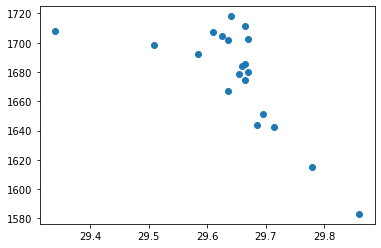

In [17]:
import numpy as np
import matplotlib.pyplot as plt

usd = np.array([29.86,29.78,29.695,29.715,29.685,
               29.665,29.67,29.635,29.625,29.665,
               29.665,29.635,29.66,29.655,29.67,
               29.64,29.61,29.585,29.51,29.34])

gold = np.array([1583.1,1615,1651.35,1642.8,1643.8,
                1674.75,1680.25,1701.65,1704.65,1711.1,
                1685.2,1667.3,1684,1678.75,1702.65,
                1718.1,1707.1,1692.2,1698.65,1708.1])

plt.scatter(usd, gold)
plt.show()

In [18]:
print(np.corrcoef(usd, gold))

[[ 1.         -0.70533216]
 [-0.70533216  1.        ]]


In [19]:
# 求出迴歸模型
print(np.polyfit(usd, gold, 1).round(1))

[-245.1 8944.1]


In [21]:
# 在程式中用回歸模型做預測
coef = np.polyfit(usd, gold, 1)
reg_model = np.poly1d(coef)

print(reg_model)

 
-245.1 x + 8944


In [22]:
print(reg_model(29.75).round(3))

1652.587


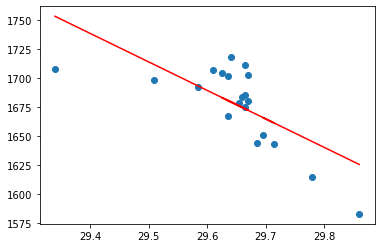

In [23]:
# 繪製簡單回歸模型
plt.scatter(usd, gold)
plt.plot(usd, reg_model(usd), color='red')
plt.show()

In [24]:
print(reg_model(usd).round(3))

[1625.626 1645.234 1666.067 1661.165 1668.518 1673.42  1672.194 1680.772
 1683.223 1673.42  1673.42  1680.772 1674.645 1675.871 1672.194 1679.547
 1686.9   1693.027 1711.409 1753.075]


放大圖形、加入圖表標題及軸文字、加入圖例和格線、調整圖表中文字大小

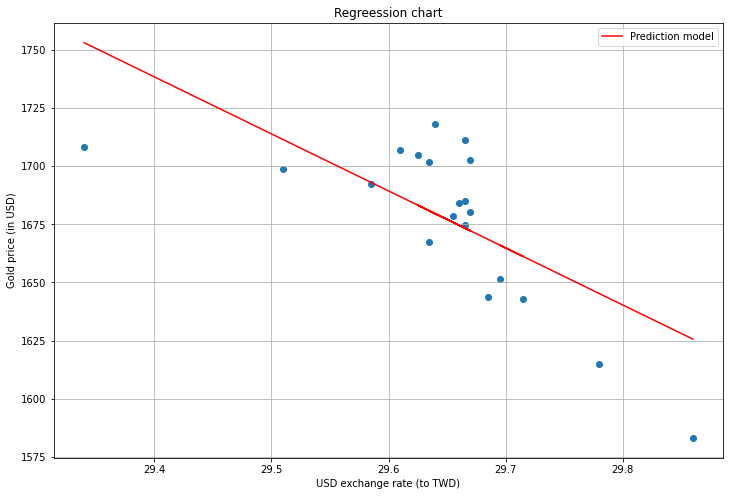

In [25]:
plt.figure(figsize=(12,8))

plt.scatter(usd, gold)
plt.plot(usd, reg_model(usd), color='red', label='Prediction model')

plt.title('Regreession chart')
plt.xlabel('USD exchange rate (to TWD)')
plt.ylabel('Gold price (in USD)')
plt.legend()
plt.grid(True)
plt.show()

在圖表中顯示中文

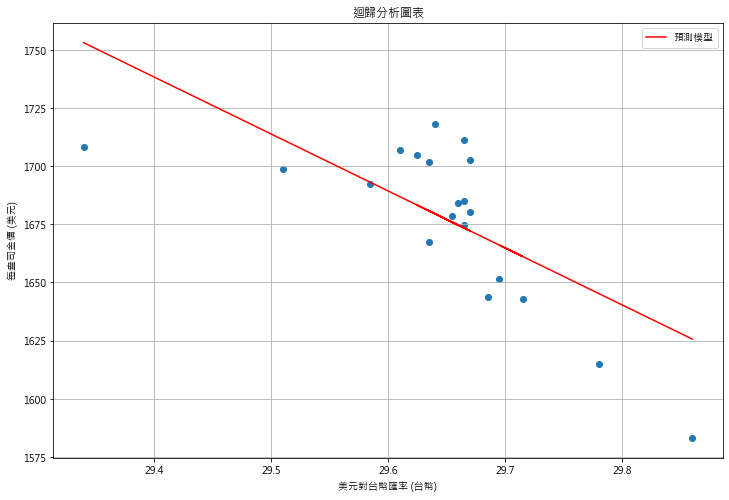

In [27]:
plt.figure(figsize=(12,8))
plt.rcParams['font.family'] = 'Microsoft JhengHei'

plt.scatter(usd, gold)
plt.plot(usd, reg_model(usd), color='red', label='預測模型')

plt.title('迴歸分析圖表')
plt.xlabel('美元對台幣匯率 (台幣)')
plt.ylabel('每盎司金價 (美元)')
plt.legend()
plt.grid(True)
plt.show()

非線性迴歸模型

        2
-897.7 x + 5.289e+04 x - 7.774e+05


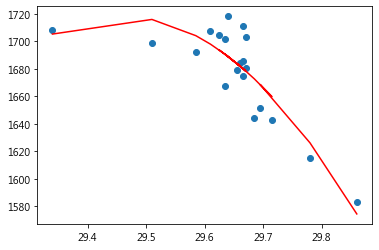

In [28]:
import numpy as np
import matplotlib.pyplot as plt

usd = np.array([29.86,29.78,29.695,29.715,29.685,
               29.665,29.67,29.635,29.625,29.665,
               29.665,29.635,29.66,29.655,29.67,
               29.64,29.61,29.585,29.51,29.34])

gold = np.array([1583.1,1615,1651.35,1642.8,1643.8,
                1674.75,1680.25,1701.65,1704.65,1711.1,
                1685.2,1667.3,1684,1678.75,1702.65,
                1718.1,1707.1,1692.2,1698.65,1708.1])

coef = np.polyfit(usd, gold, 2)
reg2_model = np.poly1d(coef)
print(reg2_model)

plt.scatter(usd, gold)
plt.plot(usd, reg2_model(usd), color='red')
plt.show()

            5             4             3             2
-4.873e+04 x + 7.249e+06 x - 4.313e+08 x + 1.283e+10 x - 1.909e+11 x + 1.136e+12


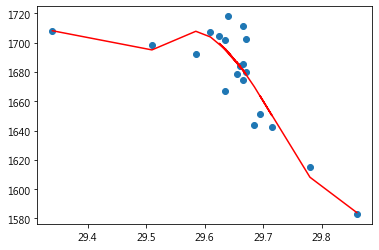

In [29]:
# 調整次方
coef = np.polyfit(usd,gold, 5)
reg5_model = np.poly1d(coef)
print(reg5_model)

plt.scatter(usd, gold)
plt.plot(usd, reg5_model(usd), color='red')
plt.show()

#### 作業:利用python簡易運算完成一元線性回歸

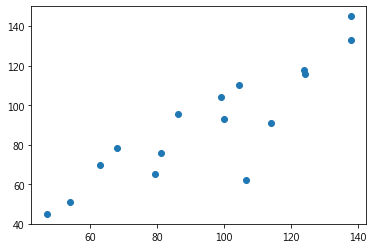

In [31]:
import numpy as np
import matplotlib.pyplot as plt

#已銷售房屋面積(m**2)
x = np.array([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,
              106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
#已銷售房屋價格
y = np.array([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,  
              62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])

plt.scatter(x, y)
plt.show()

In [34]:
# 求出迴歸模型
print(np.polyfit(x, y, 1).round(1))

[0.9 5.4]


In [36]:
# 在程式中用回歸模型做預測
coef = np.polyfit(x, y, 1)
reg_model = np.poly1d(coef)

print(reg_model)

 
0.8946 x + 5.411


In [37]:
print(reg_model(29.75).round(3))

32.024


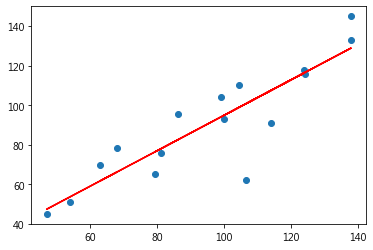

In [39]:
# 繪製簡單回歸模型
plt.scatter(x, y)
plt.plot(x, reg_model(x), color='red')
plt.show()

### 課堂練習

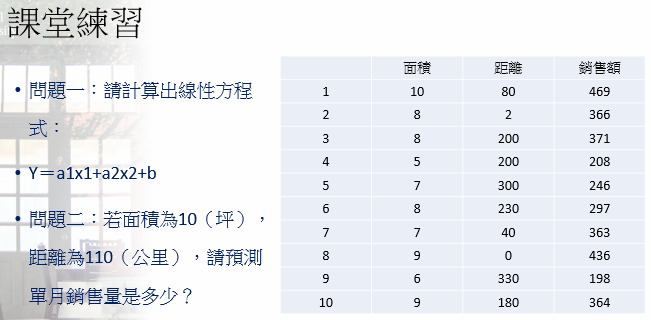

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# 創建資料信
df = pd.DataFrame({'Area':[10,8,8,5,7,8,7,9,6,9],
                  'Distance':[80,2,200,200,300,230,40,0,330,180],
                  'Sales':[469,366,371,208,246,297,363,436,198,364]})

# 擷取自變項和依變項
X = df[['Area', 'Distance']]
y = df['Sales']

# 建立線性回歸模型
model = LinearRegression()
model.fit(X, y)

# 計算迴歸係數和截距
coef = model.coef_
intercept = model.intercept_

# 輸出線性方程式
print(f"線性方程式為: Sales = {coef[0]:.2f} * Area + {coef[1]:.2f} * Distance + {intercept:.2f}")

線性方程式為: Sales = 41.46 * Area + -0.34 * Distance + 66.07


In [5]:
# 設定預測值
new_X = np.array([[10,110]])

# 預測單月銷售額
predicted_sales = model.predict(new_X)

# 輸出預測結果
print(f"當面積為10坪，距離為110公里時，單月銷售額預測值為： {predicted_sales[0]:.2f}")


當面積為10坪，距離為110公里時，單月銷售額預測值為： 442.98


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 線性迴歸分析的執行

簡單線性迴歸分析

In [40]:
import statsmodels.api as sm
y = df['ExpectEdu']
x = df['FaEdu']
x = sm.add_constant(x)
Edumodel = sm.OLS(y, x).fit()
Edumodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ExpectEdu   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     23.82
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.40e-06
Time:                        15:41:01   Log-Likelihood:                -527.43
No. Observations:                 530   AIC:                             1059.
Df Residuals:                     528   BIC:                             1067.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8946      0.083     22.907      0.000       1.732       2.057
FaEdu          0.1254      0.026      4.881      0.000       0.075       0.176
==============================================================================
Omnibus:                      111.942   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.891
Skew:                           1.258   Prob(JB):                     7.89e-43
Kurtosis:                       4.565   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
import statsmodels.formula.api as sm
model2 = sm.ols('ExpectEdu~FaEdu', df).fit()
print(model2.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x000002F510AAB8B0>>


In [43]:
import pingouin as pg
lm = pg.linear_regression(df['FaEdu'], df['ExpectEdu'])
lm.round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.895,0.083,22.907,0.0,0.043,0.041,1.732,2.057
1,FaEdu,0.125,0.026,4.881,0.0,0.043,0.041,0.075,0.176


多元線性迴歸分析

In [44]:
import statsmodels.formula.api as sm
formula = 'achievement~Sportyear+ExpectEdu+pl+al+ss+tr'
model3 = sm.ols(formula, data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            achievement   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     15.73
Date:                Mon, 01 May 2023   Prob (F-statistic):           1.23e-16
Time:                        15:44:18   Log-Likelihood:                -503.95
No. Observations:                 530   AIC:                             1022.
Df Residuals:                     523   BIC:                             1052.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5729      0.287      1.996      0.046       0.009       1.137
Sportyear      0.0065      0.012      0.553      0.581      -0.016       0.029
ExpectEdu      0.0678      0.041      1.642      0.101      -0.013       0.149
pl             0.1176      0.044      2.685      0.007       0.032       0.204
al             0.1384      0.052      2.684      0.008       0.037       0.240
ss             0.2883      0.044      6.571      0.000       0.202       0.374
tr            -0.0493      0.037     -1.334      0.183      -0.122       0.023
==============================================================================
Omnibus:                        8.215   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                5.367
Skew:                          -0.077   Prob(JB):                       0.0683
Kurtosis:                       2.532   Cond. No.                         98.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
import pingouin as pg
lm = pg.linear_regression(df[['Sportyear','ExpectEdu',
                             'pl','al','ss','tr']],
                         df['achievement'])
lm.round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.573,0.287,1.996,0.046,0.153,0.143,0.009,1.137
1,Sportyear,0.006,0.012,0.553,0.581,0.153,0.143,-0.016,0.029
2,ExpectEdu,0.068,0.041,1.642,0.101,0.153,0.143,-0.013,0.149
3,pl,0.118,0.044,2.685,0.007,0.153,0.143,0.032,0.204
4,al,0.138,0.052,2.684,0.008,0.153,0.143,0.037,0.240
5,ss,0.288,0.044,6.571,0.000,0.153,0.143,0.202,0.374
6,tr,-0.049,0.037,-1.334,0.183,0.153,0.143,-0.122,0.023
